CLUSTERING ANALYSIS

Understanding and Implementing K-Means & DBSCAN Algorithms

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


Load Dataset

In [2]:
df = pd.read_excel("/content/EastWestAirlines.xlsx")
df.head()


,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


 Exploratory Data Analysis (EDA)

 Dataset Shape & Info

In [3]:
df.shape


(26, 5)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


Missing Values Check

In [5]:
df.isnull().sum()


,0
East-West Airlines is trying to learn more about its customers. Key issues are their,8
Unnamed: 1,13
Unnamed: 2,20
Unnamed: 3,13
Unnamed: 4,8


Statistical Summary

In [6]:
df.describe()


,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,18,13,6,13,18
unique,18,3,3,3,18
top,"flying patterns, earning and use of frequent f...",NUMBER,1,Raw,Description
freq,1,9,3,9,1


Distribution & Outliers (Boxplots)

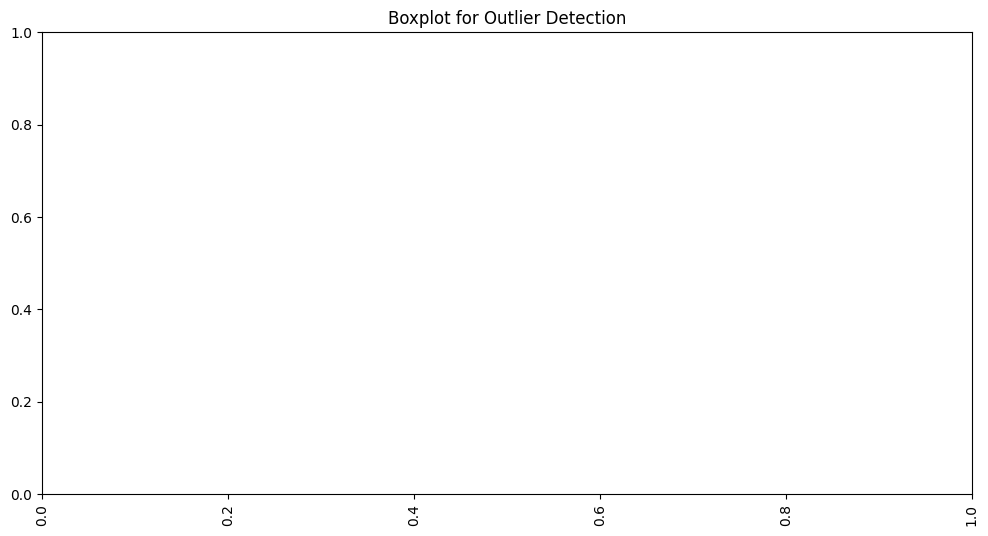

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


 Data Preprocessing

 Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)


K-Means Clustering

Elbow Method

In [11]:
wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


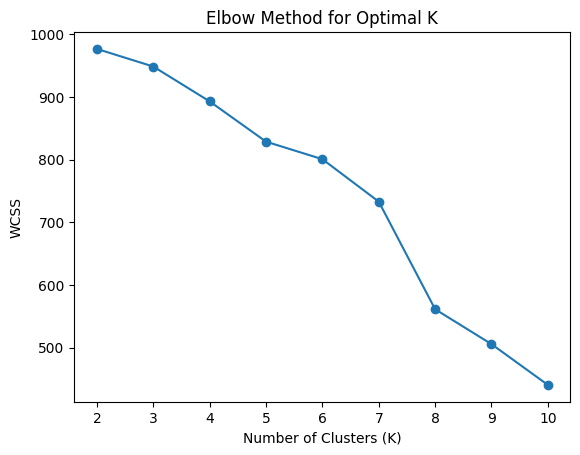

In [12]:
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


Apply K-Means (K = 3)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

df['KMeans_Cluster'] = kmeans_labels


K-Means Silhouette Score

In [14]:
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_silhouette


np.float64(-0.06790234093973267)

K-Means Cluster Visualization

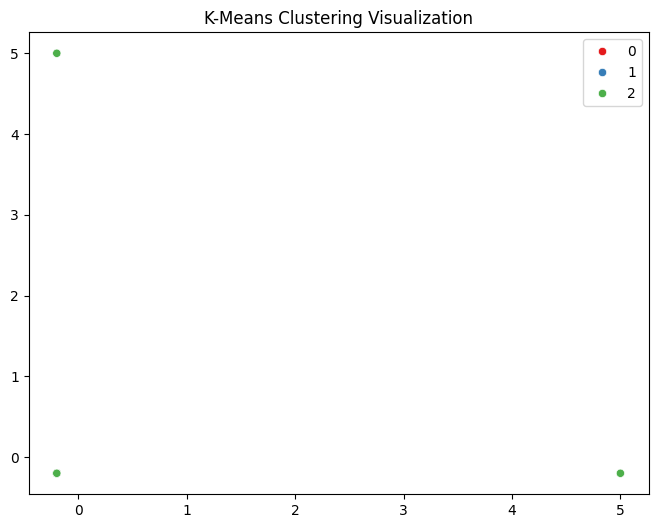

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_data[:,0],
    y=scaled_data[:,1],
    hue=kmeans_labels,
    palette='Set1'
)
plt.title("K-Means Clustering Visualization")
plt.show()


K-Means Cluster Analysis

In [18]:
df.groupby('KMeans_Cluster').mean(numeric_only=True)



,DBSCAN_Cluster
KMeans_Cluster,
0,-1.000000
1,-1.000000
2,-0.791667


 DBSCAN Clustering

 Apply DBSCAN

In [17]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

df['DBSCAN_Cluster'] = dbscan_labels


DBSCAN Cluster Distribution

In [19]:
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
-1,21
0,5


DBSCAN Silhouette Score

In [21]:
import numpy as np
from sklearn.metrics import silhouette_score

# Remove noise points
mask = dbscan_labels != -1

# Count only real clusters (exclude -1)
unique_clusters = set(dbscan_labels[mask])

if len(unique_clusters) >= 2:
    dbscan_silhouette = silhouette_score(
        scaled_data[mask],
        dbscan_labels[mask]
    )
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("Silhouette score cannot be calculated: less than 2 clusters found")


Silhouette score cannot be calculated: less than 2 clusters found


In [22]:
print("Cluster labels:", set(dbscan_labels))
print("Clusters without noise:", set(dbscan_labels[dbscan_labels != -1]))


Cluster labels: {np.int64(0), np.int64(-1)}
Clusters without noise: {np.int64(0)}


DBSCAN Visualization

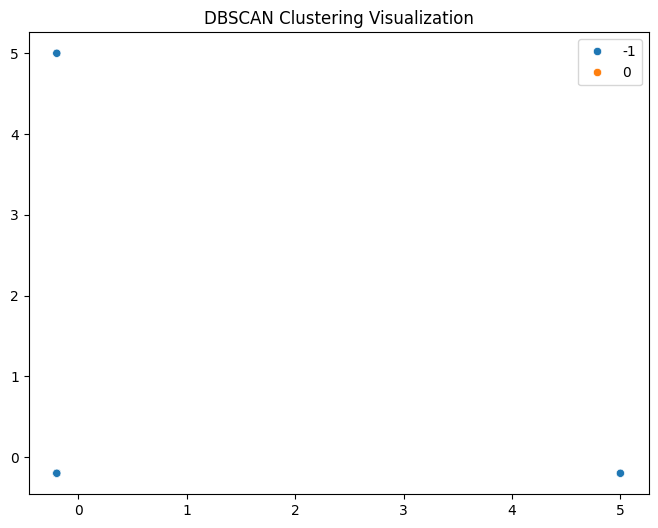

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_data[:,0],
    y=scaled_data[:,1],
    hue=dbscan_labels,
    palette='tab10'
)
plt.title("DBSCAN Clustering Visualization")
plt.show()


Final Observations & Conclusion

            Key Findings:

K-Means performed better in structured customer segmentation

DBSCAN was effective in identifying noisy/outlier customers

Scaling significantly improved clustering performance

          Practical Implications:

Airlines can target high-value clusters for loyalty programs

Low-engagement clusters can be re-activated via promotions

Outliers can be analyzed separately for risk or churn